In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#ML
from prophet import Prophet
sns.set(font_scale=1.5)

## Read in data

In [96]:
# Prepare the data. This script fixes the ABBREV.csv file and pulls the foods into their respective food groups
%run data_prep.py

In [97]:
averages_list = [cheese_average, milk_average, soup_average, cereal_average, cookies_average, babyfood_average, beans_average, rice_average, ice_cream_average, chips_average, pasta_average, fast_food_average, pizza_average, school_lunch_average, beef_average, bread_average, fish_average, candy_average, beverage_average, dressing_average, egg_average, yogurt_average, oil_average, cake_average, butter_average, chicken_average, duck_average, goose_average, emu_average, ostrich_average, cow_average, pig_average, lamb_average, veal_average, game_average, gravy_average, pie_average, pudding_average, soup_average, apple_average, apricot_average, veggie_average, nut_average, chocolate_average, snack_average]

# combine all the dataframes into one using concat
all_averages = pd.concat(averages_list, ignore_index=True)

all_averages

,id,Name,Calories,Protein_(g),Carbs_(g),Fiber_(g),Sugar_(g),Calcium_(mg),Sodium_(mg),Total_Fat_(g)
0,99999,cheese_Average,289.11,21.82,3.98,0.03,1.72,611.24,750.67,18.47
1,99999,milk_Average,124.88,8.70,14.60,0.07,15.48,293.37,171.92,3.17
2,99999,soup_Average,70.04,2.98,9.62,1.44,2.20,20.31,451.28,1.70
3,99999,cereal_Average,342.02,8.26,73.34,7.65,20.64,159.42,377.38,2.22
4,99999,cookies_Average,468.50,5.32,67.03,2.91,31.26,52.47,342.51,14.08
5,99999,babyfood_Average,145.75,3.91,21.51,1.00,13.39,133.89,53.83,3.78
6,99999,beans_Average,134.97,9.26,22.06,7.49,2.11,63.14,138.44,0.69
7,99999,rice_Average,254.88,5.55,53.96,1.92,0.86,19.44,83.31,0.86
8,99999,ice_cream_Average,215.10,4.76,28.17,1.44,16.46,120.12,89.02,8.45
9,99999,chips_Average,478.56,7.21,63.47,5.02,11.43,77.41,436.96,13.25


In [71]:
milk.loc['9999'] = milk.mean()
milk.loc['9999', ['Name']] = ['milk_Average']
milk.loc['9999', ['id']] = ['99999']
milk = milk.round(decimals=2)
milk_average = milk.tail(1)


/tmp/ipykernel_99746/3910600097.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  milk.loc['9999'] = milk.mean()


In [55]:
#Create heatmap to check correlation in data
correlation = df[["Calories", 'Carbs_(g)', 'Protein_(g)', "Sugar_(g)", "Calcium_(mg)", "Total_Fat_(g)", "Sodium_(mg)"]].copy()
sns.set_theme(style="white")
corr = correlation.corr(method = 'pearson',  # The method of correlation
                  min_periods = 1 )
corr.style.background_gradient(cmap='coolwarm')

,Calories,Carbs_(g),Protein_(g),Sugar_(g),Calcium_(mg),Total_Fat_(g),Sodium_(mg)
Calories,1.000000,0.493028,0.112636,0.351313,0.143632,0.754681,0.055515
Carbs_(g),0.493028,1.000000,-0.304295,0.678416,0.214085,-0.095558,0.073636
Protein_(g),0.112636,-0.304295,1.000000,-0.302557,0.038643,0.059670,-0.003324
Sugar_(g),0.351313,0.678416,-0.302557,1.000000,0.154179,-0.009460,-0.004457
Calcium_(mg),0.143632,0.214085,0.038643,0.154179,1.000000,0.013795,0.178618
Total_Fat_(g),0.754681,-0.095558,0.059670,-0.009460,0.013795,1.000000,0.001700
Sodium_(mg),0.055515,0.073636,-0.003324,-0.004457,0.178618,0.001700,1.000000


#### Notes: It appears that there isn't any strong correlations between any of the fields. The highest is between calories and fat, then sugar and carbs.

## Cheese

In [56]:
sns.set_theme(style="white")
corr = cheese.corr(method = 'pearson',  # The method of correlation
                  min_periods = 1)
corr.style.background_gradient(cmap='coolwarm')

/tmp/ipykernel_99746/536614984.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = cheese.corr(method = 'pearson',  # The method of correlation


,id,Calories,Protein_(g),Carbs_(g),Fiber_(g),Sugar_(g),Calcium_(mg),Sodium_(mg),Total_Fat_(g)
id,1.000000,-0.346879,0.024171,0.047050,0.270138,0.260555,-0.110368,-0.179933,-0.389155
Calories,-0.346879,1.000000,0.500575,-0.001562,-0.233014,-0.338780,0.535689,0.173702,0.964860
Protein_(g),0.024171,0.500575,1.000000,-0.236764,0.075032,-0.370557,0.808283,0.275684,0.337577
Carbs_(g),0.047050,-0.001562,-0.236764,1.000000,-0.019162,0.644928,-0.064057,0.111002,-0.131728
Fiber_(g),0.270138,-0.233014,0.075032,-0.019162,1.000000,-0.001600,0.025374,-0.049954,-0.270913
Sugar_(g),0.260555,-0.338780,-0.370557,0.644928,-0.001600,1.000000,-0.238157,0.078457,-0.333567
Calcium_(mg),-0.110368,0.535689,0.808283,-0.064057,0.025374,-0.238157,1.000000,0.485584,0.384445
Sodium_(mg),-0.179933,0.173702,0.275684,0.111002,-0.049954,0.078457,0.485584,1.000000,0.087824
Total_Fat_(g),-0.389155,0.964860,0.337577,-0.131728,-0.270913,-0.333567,0.384445,0.087824,1.000000


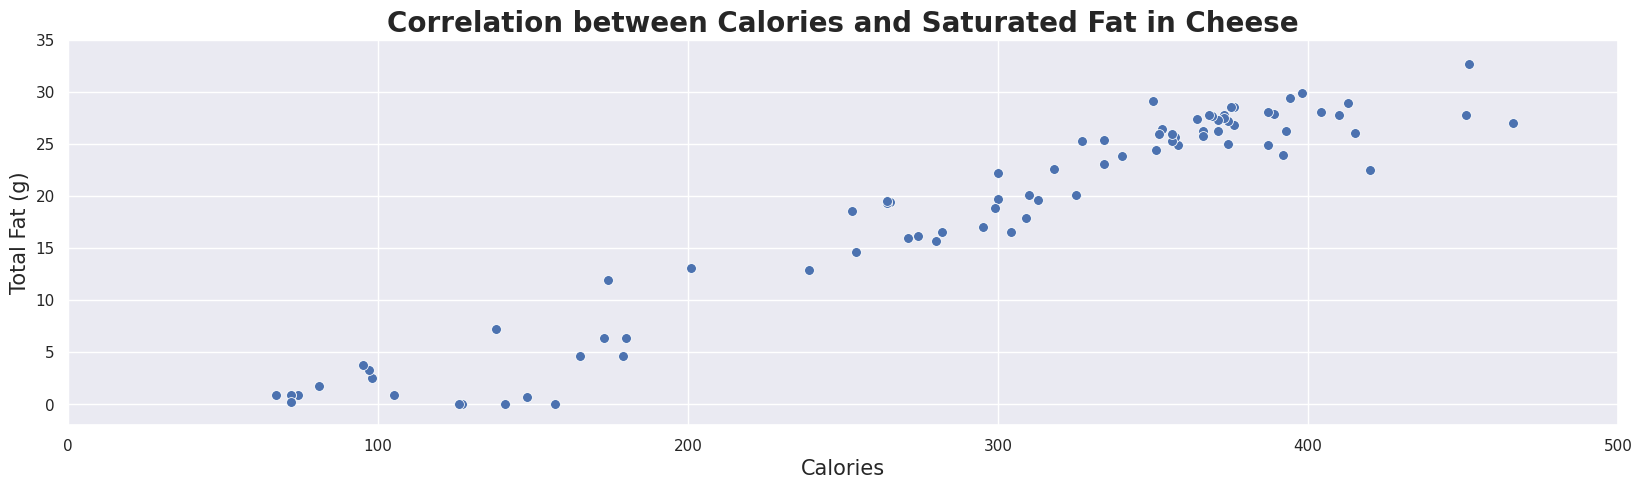

In [57]:
#Scatter plot comparing Calories with Saturated Fat in Cheese
sns.set(rc={"figure.figsize":(20, 5)})
scatter = sns.scatterplot(data=cheese, x='Calories', y='Total_Fat_(g)', legend='auto', s=50)
scatter.set_title("Correlation between Calories and Saturated Fat in Cheese", fontdict={'size': 20, 'weight': 'bold'})
scatter.set_xlabel('Calories', fontdict={'size': 15})
scatter.set_ylabel('Total Fat (g)', fontdict={'size': 15})
plt.ylim(-2, 35)
plt.xlim(0, 500)
plt.show()

### Notes: Strong correlation between fat and calorie content in cheese

## Milk

In [58]:
sns.set_theme(style="white")
corr = milk.corr(method = 'pearson', min_periods = 1)
corr.style.background_gradient(cmap='coolwarm')

/tmp/ipykernel_99746/2617500500.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = milk.corr(method = 'pearson', min_periods = 1)


,id,Calories,Protein_(g),Carbs_(g),Fiber_(g),Sugar_(g),Calcium_(mg),Sodium_(mg),Total_Fat_(g)
id,1.000000,-0.155882,-0.132160,-0.144628,-0.077669,-0.174167,-0.108673,-0.076369,-0.118104
Calories,-0.155882,1.000000,0.910730,0.927607,-0.109773,0.926619,0.873632,0.611315,0.589287
Protein_(g),-0.132160,0.910730,1.000000,0.923189,-0.151723,0.916275,0.932760,0.729656,0.259153
Carbs_(g),-0.144628,0.927607,0.923189,1.000000,-0.061857,0.995417,0.863913,0.674639,0.275499
Fiber_(g),-0.077669,-0.109773,-0.151723,-0.061857,1.000000,-0.118184,-0.140042,-0.101667,-0.065721
Sugar_(g),-0.174167,0.926619,0.916275,0.995417,-0.118184,1.000000,0.914830,0.905263,0.340660
Calcium_(mg),-0.108673,0.873632,0.932760,0.863913,-0.140042,0.914830,1.000000,0.438741,0.305352
Sodium_(mg),-0.076369,0.611315,0.729656,0.674639,-0.101667,0.905263,0.438741,1.000000,0.038411
Total_Fat_(g),-0.118104,0.589287,0.259153,0.275499,-0.065721,0.340660,0.305352,0.038411,1.000000


#### Notes: High correlation among many fields, especially sugar, protein, carbs, and calcium

### Are "lowfat milks" really low in fat?

In [59]:
#milk = milk.sort_values(by='Saturated_Fat_(g)', ascending=False)
fat = ['NONFAT', 'FAT FREE', 'LOWFAT', 'LOW FAT', 'LO FAT']
pattern = '|'.join(fat)

lowfat_milk = milk[milk["Name"].str.contains(pattern)]
other_milk = milk[~milk["Name"].str.contains(pattern)]

In [60]:
#Create row for "low fat" milk with averages for all columns
lowfat_milk.loc['9998'] = lowfat_milk.mean()
lowfat_milk.loc['9998', ['Name']] = ['Low_Fat_Milk_Average']
lowfat_milk.loc['9998', ['id']] = ['99998']
lowfat_milk = lowfat_milk.round(decimals=2)

#Create row for all other milk with averages for all columns
other_milk.loc['9999'] = other_milk.mean()
other_milk.loc['9999', ['Name']] = ['Other_Milk_Average']
other_milk.loc['9999', ['id']] = ['99999']
other_milk = other_milk.round(decimals=2)

#Combine the two and compare
compare_milk = pd.concat([lowfat_milk.loc['9998'], other_milk.loc['9999']], axis=1)
compare_milk.rename(columns={'9998': 'Low_Fat_Milk_Average', '9999': 'Other_Milk_Average'}, inplace=True)

#drop first two rows
compare_milk = compare_milk.iloc[2:]
compare_milk

/tmp/ipykernel_99746/525924489.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  lowfat_milk.loc['9998'] = lowfat_milk.mean()
/tmp/ipykernel_99746/525924489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lowfat_milk.loc['9998'] = lowfat_milk.mean()
/tmp/ipykernel_99746/525924489.py:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  other_milk

,Low_Fat_Milk_Average,Other_Milk_Average
Calories,129.74,121.8
Protein_(g),12.19,6.49
Carbs_(g),18.61,12.07
Fiber_(g),0.01,0.11
Sugar_(g),19.73,13.0
Calcium_(mg),384.11,235.9
Sodium_(mg),287.11,98.97
Total_Fat_(g),0.57,4.82


### Notes: The Low Fat Milk option does have less fat than other milks, as well as more protein and calcium. However, the calorie count remains similar among both

## Fruits

/tmp/ipykernel_99746/2712428427.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  fruit.loc['9999'] = fruit.mean()


,id,Name,Calories,Protein_(g),Carbs_(g),Fiber_(g),Sugar_(g),Calcium_(mg),Sodium_(mg),Total_Fat_(g)
9999,99999,Fruit_Average,86.73,1.49,19.57,2.11,14.05,34.52,32.63,0.57
